## Ejercicio - Quién está hablando - nlp

In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
from nltk.corpus import stopwords
from unidecode import unidecode

* Descargo los stopwords que usare en el analisis de texto

In [7]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
url = "https://raw.githubusercontent.com/fferegrino/cf-ml/main/quien-esta-hablando/dialogos.csv"
df = pd.read_csv(url, index_col=0)

#### Cargar base y crear etiqueta que me interesa para el analisis

* Estoy creado tipo_speaker que es de lo que hare prediccion mas adelante
* El problema seria saber si el que habla es politico o medico en la conferencia
* Es un problema de analisis supervisado de clasificacion binaria

In [26]:
df['tipo_speaker'] = np.where(df['speaker'] =='amlo','politico','medico')

#### Encontrando metrica que usaremos para evaluar el problema
* Metricas de negocio
    * Nro de dialogos del politico
    * Todos los dialogos que el medico esta diciendo
* Metricas del modelo machine learning
    * Accuracy = exactitud

#### EDA
* Tengo que encontrar caracteristicas que difrencian estas etiquetas

##### Distribucion de etiquetas
* No es un dataset tan desbalanceado, aun se podria trabajar con este dataset
* 70 politico y 30 medico

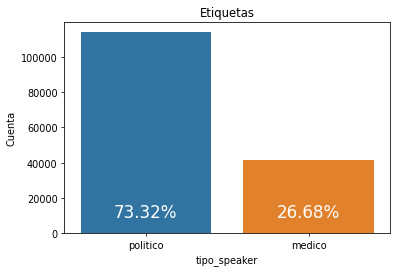

In [27]:
fig = plt.figure(dpi=70)
ax = fig.gca()
sns.countplot(x='tipo_speaker', data=df, ax=ax)
ax.set_title("Etiquetas")
ax.set_xlabel("tipo_speaker")
ax.set_ylabel("Cuenta")

percentages = (df["tipo_speaker"].value_counts() / len(df)).to_dict()
xs = {label.get_text():idx for idx, label in enumerate(ax.get_xticklabels())}
for label, pct in percentages.items():
#    x = labels[label].get_x()
    ax.text(xs[label],9000, f"{pct:0.2%}", ha='center', fontsize="xx-large", c="white")
    pass

##### Longitud de los dialogos
* Hp: EL politico tiene dialogos mas grandes que el medico --> rechazo esta hipotesis porque elgrafico de violin muestra que no hya mucha diferencia entre los dialogos


In [28]:
lengths = df["dialog"].str.len()

df_lenghts = pd.DataFrame({
    "tipo_speaker": df["tipo_speaker"],
    "length": lengths
})


<AxesSubplot:xlabel='length', ylabel='tipo_speaker'>

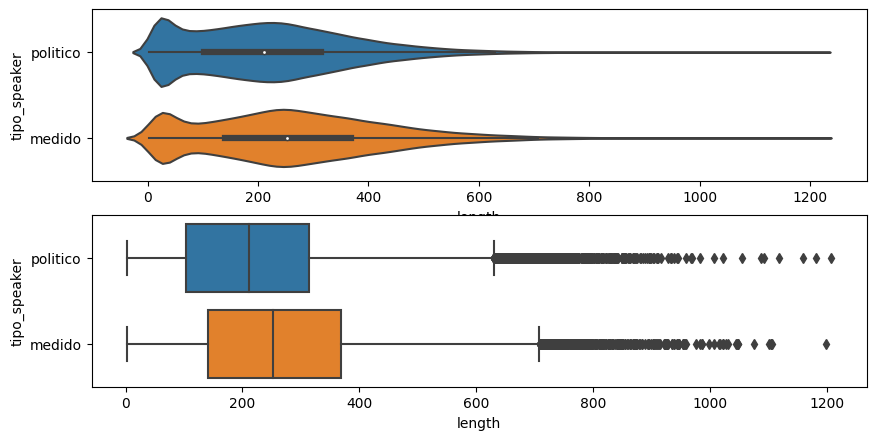

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=100, figsize=(10,5))

sns.violinplot(y="tipo_speaker" , x="length", data=df_lenghts, ax=ax1)
sns.boxplot(y="tipo_speaker" , x="length", data=df_lenghts, ax=ax2)

##### Distribucion de los dialogos
* Al precer los dialogos no son normales
* Presentan dos picos, uno en 24 caracteres y otro en 48 a mas
* Se podrian hacer dos analisis

C:\Users\Anna\AppData\Local\Temp/ipykernel_11536/1716272024.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{int(_y)}-{int(_x)}" for _x,_y in zip(bins[1:], bins[:-1])], rotation=90, fontsize=9)


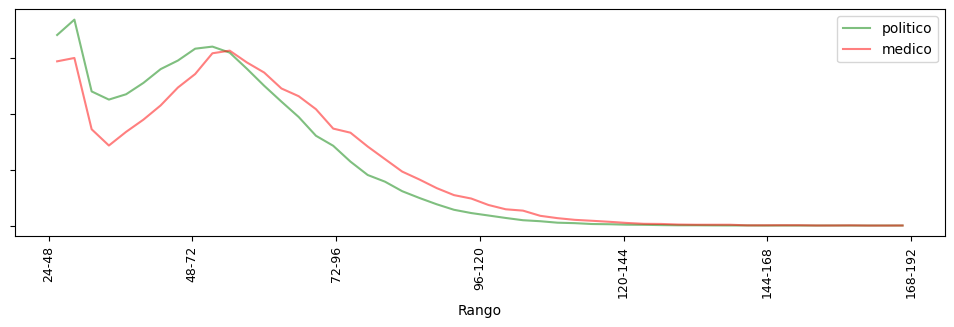

In [31]:
fig = plt.figure(dpi=100, figsize=(12, 3))
ax = fig.gca()

for label, color in [("politico", "green"), ("medico", "red")]:
    lengths = df_lenghts[df_lenghts["tipo_speaker"] == label]
    values, bins = np.histogram(lengths["length"], range=(0, 1200), bins=50)
    y = (bins[1:] + bins[:-1]) / 2
    sns.lineplot(x=y, y=values/ len(lengths), label=label, color= color, ax=ax, alpha=0.5 )
ax.set_xticklabels([f"{int(_y)}-{int(_x)}" for _x,_y in zip(bins[1:], bins[:-1])], rotation=90, fontsize=9)
ax.set_yticklabels([])
ax.set_xlabel("Rango")
ax.legend()

##### Hacer un wordcloud para ver de que habla mas cada politico

In [17]:
# ver random examples
df_lenghts

,tipo_speaker,length
0,politico,47
1,politico,91
2,politico,471
3,politico,338
4,politico,113
...,...,...
155502,politico,30
155503,politico,30
155504,politico,13
155505,politico,13
